In [12]:
%matplotlib inline

In [13]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
import geopandas as gpd


In [14]:
# source files
df1 = pd.read_csv('ref_table_precinct_locations.csv')
df2 = pd.read_csv('ref_table_precinct_locations_PSGC.csv')
df3 = pd.read_csv('results_president.csv')
df4 = pd.read_csv('results_vice-president.csv')

# Shape files
ph_country = gpd.read_file("shp_files/gadm36_PHL_0.shp")
ph_province = gpd.read_file("shp_files/gadm36_PHL_1.shp")

## Data Transformation

In [15]:
# precinct lookup dataset
df1

# check if all precinct code is unique -- True
# pd.Series(df1["precinct_code"]).is_unique

,precinct_code,region,province,municipality,barangay,registered_voters,ballots_cast
0,55170026,REGION I,PANGASINAN,CALASIAO,BUENLAG,592,503
1,55170027,REGION I,PANGASINAN,CALASIAO,BUENLAG,526,458
2,55170023,REGION I,PANGASINAN,CALASIAO,BUENLAG,723,649
3,55170022,REGION I,PANGASINAN,CALASIAO,BUENLAG,768,650
4,55170025,REGION I,PANGASINAN,CALASIAO,BUENLAG,787,662
...,...,...,...,...,...,...,...
90637,72080005,REGION IX,ZAMBOANGA DEL NORTE,MUTIA,DILAND,327,284
90638,72080007,REGION IX,ZAMBOANGA DEL NORTE,MUTIA,HEAD TIPAN,252,235
90639,72080018,REGION IX,ZAMBOANGA DEL NORTE,MUTIA,SANTO TOMAS,628,529
90640,72080017,REGION IX,ZAMBOANGA DEL NORTE,MUTIA,SANTO TOMAS,532,474


In [16]:
# precinct complete dataset
df2

# check if all precinct code is unique -- True
# pd.Series(df2["precinct_code"]).is_unique

,Unnamed: 0,precinct_code,region,province,municipality,barangay,registered_voters,ballots_cast,PSGC_CM,is_city,income_class,population,land_area,province_CM,municipality_CM
0,0,55170026,REGION I,PANGASINAN,CALASIAO,BUENLAG,592,503,15517000,0.0,1st,91109.0,4836.0,PANGASINAN,CALASIAO
1,1,55170027,REGION I,PANGASINAN,CALASIAO,BUENLAG,526,458,15517000,0.0,1st,91109.0,4836.0,PANGASINAN,CALASIAO
2,2,55170023,REGION I,PANGASINAN,CALASIAO,BUENLAG,723,649,15517000,0.0,1st,91109.0,4836.0,PANGASINAN,CALASIAO
3,3,55170022,REGION I,PANGASINAN,CALASIAO,BUENLAG,768,650,15517000,0.0,1st,91109.0,4836.0,PANGASINAN,CALASIAO
4,4,55170025,REGION I,PANGASINAN,CALASIAO,BUENLAG,787,662,15517000,0.0,1st,91109.0,4836.0,PANGASINAN,CALASIAO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90637,90637,72080005,REGION IX,ZAMBOANGA DEL NORTE,MUTIA,DILAND,327,284,97208000,0.0,5th,11975.0,7358.0,ZAMBOANGA DEL NORTE,MUTIA
90638,90638,72080007,REGION IX,ZAMBOANGA DEL NORTE,MUTIA,HEAD TIPAN,252,235,97208000,0.0,5th,11975.0,7358.0,ZAMBOANGA DEL NORTE,MUTIA
90639,90639,72080018,REGION IX,ZAMBOANGA DEL NORTE,MUTIA,SANTO TOMAS,628,529,97208000,0.0,5th,11975.0,7358.0,ZAMBOANGA DEL NORTE,MUTIA
90640,90640,72080017,REGION IX,ZAMBOANGA DEL NORTE,MUTIA,SANTO TOMAS,532,474,97208000,0.0,5th,11975.0,7358.0,ZAMBOANGA DEL NORTE,MUTIA


In [17]:
# presidential results
df3
 
# check if all precinct code is unique -- False
# pd.Series(df3["precinct_code"]).is_unique

,precinct_code,contest_code,candidate_name,party_code,votes,col5,ballots_cast,col7,col8,timestamp,pct_votes
0,69140005,199009,"DUTERTE, RODY (PDPLBN)",114,124,3,639,13,8,05/09/2016 17:05:50,0.194053
1,69140005,199009,"DEFENSOR SANTIAGO, MIRIAM (PRP)",135,12,2,639,13,8,05/09/2016 17:05:50,0.018779
2,69140005,199009,"BINAY, JOJO (UNA)",163,94,1,639,13,8,05/09/2016 17:05:50,0.147105
3,69140005,199009,"ROXAS, MAR DAANG MATUWID (LP)",85,126,5,639,13,8,05/09/2016 17:05:50,0.197183
4,69140005,199009,"SEÑERES, ROY (WPPPMM)",165,1,6,639,13,8,05/09/2016 17:05:50,0.001565
...,...,...,...,...,...,...,...,...,...,...,...
542149,65100028,199009,"DEFENSOR SANTIAGO, MIRIAM (PRP)",135,0,2,506,30,14,05/12/2016 09:05:03,0.000000
542150,65100028,199009,"BINAY, JOJO (UNA)",163,44,1,506,30,14,05/12/2016 09:05:03,0.086957
542151,65100028,199009,"ROXAS, MAR DAANG MATUWID (LP)",85,131,5,506,30,14,05/12/2016 09:05:03,0.258893
542152,65100028,199009,"SEÑERES, ROY (WPPPMM)",165,0,6,506,30,14,05/12/2016 09:05:03,0.000000


In [18]:
# vp results
df4

# check if all precinct code is unique -- False
# pd.Series(df3["precinct_code"]).is_unique


,precinct_code,contest_code,candidate_name,party_code,votes,col5,ballots_cast,col7,col8,timestamp,pct_votes
0,10030074,299009,"ROBREDO, LENI DAANG MATUWID (LP)",85,185,5,535,25,9,05/09/2016 17:07:51,0.345794
1,10030074,299009,"ESCUDERO, CHIZ (IND)",58,133,2,535,25,9,05/09/2016 17:07:51,0.248598
2,10030074,299009,"CAYETANO, ALAN PETER (IND)",58,36,1,535,25,9,05/09/2016 17:07:51,0.067290
3,1070001,299009,"MARCOS, BONGBONG (IND)",58,498,4,558,15,2,05/09/2016 17:07:53,0.892473
4,36320001,299009,"MARCOS, BONGBONG (IND)",58,368,4,442,19,1,05/09/2016 17:05:50,0.832579
...,...,...,...,...,...,...,...,...,...,...,...
542155,65100021,299009,"TRILLANES, ANTONIO IV (IND)",58,10,6,620,74,1,05/12/2016 09:01:22,0.016129
542156,65100021,299009,"HONASAN, GRINGO (UNA)",163,25,3,620,74,1,05/12/2016 09:01:22,0.040323
542157,65100021,299009,"ROBREDO, LENI DAANG MATUWID (LP)",85,290,5,620,74,1,05/12/2016 09:01:22,0.467742
542158,65100021,299009,"ESCUDERO, CHIZ (IND)",58,42,2,620,74,1,05/12/2016 09:01:22,0.067742


In [19]:
df_pres = pd.merge(df1, df3, on="precinct_code", how="outer")
df_pres = df_pres.dropna()
df_pres = df_pres.drop(columns=["precinct_code", "registered_voters", "ballots_cast_x"])
df_pres

,region,province,municipality,barangay,contest_code,candidate_name,party_code,votes,col5,ballots_cast_y,col7,col8,timestamp,pct_votes
0,REGION I,PANGASINAN,CALASIAO,BUENLAG,199009.0,"DUTERTE, RODY (PDPLBN)",114.0,177.0,3.0,503.0,17.0,12.0,05/09/2016 19:11:37,0.351889
1,REGION I,PANGASINAN,CALASIAO,BUENLAG,199009.0,"DEFENSOR SANTIAGO, MIRIAM (PRP)",135.0,17.0,2.0,503.0,17.0,12.0,05/09/2016 19:11:37,0.033797
2,REGION I,PANGASINAN,CALASIAO,BUENLAG,199009.0,"BINAY, JOJO (UNA)",163.0,34.0,1.0,503.0,17.0,12.0,05/09/2016 19:11:37,0.067594
3,REGION I,PANGASINAN,CALASIAO,BUENLAG,199009.0,"ROXAS, MAR DAANG MATUWID (LP)",85.0,96.0,5.0,503.0,17.0,12.0,05/09/2016 19:11:37,0.190855
4,REGION I,PANGASINAN,CALASIAO,BUENLAG,199009.0,"SEÑERES, ROY (WPPPMM)",165.0,1.0,6.0,503.0,17.0,12.0,05/09/2016 19:11:37,0.001988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542381,REGION IX,ZAMBOANGA DEL NORTE,MUTIA,SANTO TOMAS,199009.0,"DEFENSOR SANTIAGO, MIRIAM (PRP)",135.0,2.0,2.0,474.0,39.0,17.0,05/10/2016 23:11:07,0.004219
542382,REGION IX,ZAMBOANGA DEL NORTE,MUTIA,SANTO TOMAS,199009.0,"BINAY, JOJO (UNA)",163.0,25.0,1.0,474.0,39.0,17.0,05/10/2016 23:11:07,0.052743
542383,REGION IX,ZAMBOANGA DEL NORTE,MUTIA,SANTO TOMAS,199009.0,"ROXAS, MAR DAANG MATUWID (LP)",85.0,134.0,5.0,474.0,39.0,17.0,05/10/2016 23:11:07,0.282700
542384,REGION IX,ZAMBOANGA DEL NORTE,MUTIA,SANTO TOMAS,199009.0,"SEÑERES, ROY (WPPPMM)",165.0,0.0,6.0,474.0,39.0,17.0,05/10/2016 23:11:07,0.000000


In [20]:
df_vp = pd.merge(df1, df4, on="precinct_code", how="outer")
df_vp = df_vp.dropna()
df_vp = df_vp.drop(columns=["precinct_code", "registered_voters", "ballots_cast_x"])
df_vp.head()

,region,province,municipality,barangay,contest_code,candidate_name,party_code,votes,col5,ballots_cast_y,col7,col8,timestamp,pct_votes
0,REGION I,PANGASINAN,CALASIAO,BUENLAG,299009.0,"MARCOS, BONGBONG (IND)",58.0,230.0,4.0,503.0,27.0,11.0,05/09/2016 19:11:37,0.457256
1,REGION I,PANGASINAN,CALASIAO,BUENLAG,299009.0,"TRILLANES, ANTONIO IV (IND)",58.0,8.0,6.0,503.0,27.0,11.0,05/09/2016 19:11:37,0.015905
2,REGION I,PANGASINAN,CALASIAO,BUENLAG,299009.0,"HONASAN, GRINGO (UNA)",163.0,8.0,3.0,503.0,27.0,11.0,05/09/2016 19:11:37,0.015905
3,REGION I,PANGASINAN,CALASIAO,BUENLAG,299009.0,"ROBREDO, LENI DAANG MATUWID (LP)",85.0,138.0,5.0,503.0,27.0,11.0,05/09/2016 19:11:37,0.274354
4,REGION I,PANGASINAN,CALASIAO,BUENLAG,299009.0,"ESCUDERO, CHIZ (IND)",58.0,47.0,2.0,503.0,27.0,11.0,05/09/2016 19:11:37,0.093439


In [21]:
# Shape File
ph_province

shp_df = ph_province[["NAME_1", "geometry"]]
shp_df = shp_df.rename(columns={"NAME_1": "province"})
shp_df['province'] = shp_df['province'].str.upper()
shp_df

,province,geometry
0,ABRA,"POLYGON ((120.77472687 17.1631794, 120.7663726..."
1,AGUSAN DEL NORTE,"POLYGON ((125.4462738 8.66631031, 125.44199371..."
2,AGUSAN DEL SUR,"POLYGON ((125.90923309 7.9984498, 125.90175629..."
3,AKLAN,"(POLYGON ((122.42082977 11.63193989, 122.41999..."
4,ALBAY,"(POLYGON ((123.28764343 13.04922962, 123.28685..."
...,...,...
76,TAWI-TAWI,"(POLYGON ((119.46694183 4.58693981, 119.466392..."
77,ZAMBALES,"(POLYGON ((120.0828476 14.7504797, 120.0822219..."
78,ZAMBOANGA DEL NORTE,"(POLYGON ((122.09467316 7.53151989, 122.094673..."
79,ZAMBOANGA DEL SUR,"(POLYGON ((122.29815674 6.87506008, 122.298156..."


## Data Analysis

### President

#### President - Winner

In [23]:
# Winner: President
pres_win = df_pres.groupby("candidate_name").agg(np.sum).drop(columns=["contest_code", "party_code", "ballots_cast_y", "col5", "col7", "col8", "pct_votes"])
pres_win = pres_win.reset_index()
pres_win

,candidate_name,votes
0,"BINAY, JOJO (UNA)",5313049.0
1,"DEFENSOR SANTIAGO, MIRIAM (PRP)",1420415.0
2,"DUTERTE, RODY (PDPLBN)",15908929.0
3,"POE, GRACE (IND)",8928252.0
4,"ROXAS, MAR DAANG MATUWID (LP)",9677340.0
5,"SEÑERES, ROY (WPPPMM)",25108.0


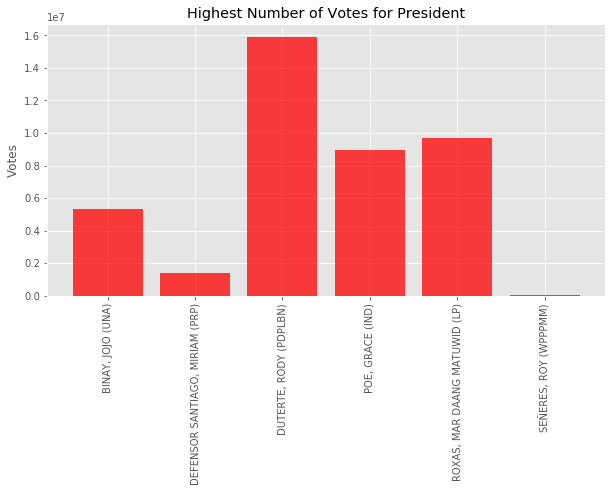

In [24]:
plt.figure(figsize=(10,5))
plt.style.use("ggplot")
plt.bar(pres_win["candidate_name"], pres_win["votes"], color='red', alpha=0.75)
plt.xticks(rotation=90)

plt.ylabel("Votes")

plt.title("Highest Number of Votes for President")
plt.show()

#### Provinces

In [25]:
# Provinces x Winning Candidate

pres_prov = df_pres.groupby(["province", "candidate_name"]).sum().drop(columns=["contest_code", "party_code", "ballots_cast_y", "col5", "col7", "col8", "pct_votes"]).sort_values("votes",ascending=False)
pres_prov = pres_prov.groupby(level=0).head(1)
pres_prov = pres_prov.reset_index()
pres_prov 

# pd.Series(pres_prov["province"]).is_unique


,province,candidate_name,votes
0,CEBU,"DUTERTE, RODY (PDPLBN)",1128069.0
1,DAVAO DEL SUR,"DUTERTE, RODY (PDPLBN)",880764.0
2,NATIONAL CAPITAL REGION - SECOND DISTRICT,"DUTERTE, RODY (PDPLBN)",716938.0
3,NEGROS OCCIDENTAL,"ROXAS, MAR DAANG MATUWID (LP)",665736.0
4,ILOILO,"ROXAS, MAR DAANG MATUWID (LP)",657717.0
...,...,...,...
85,APAYAO,"BINAY, JOJO (UNA)",21793.0
86,MOUNTAIN PROVINCE,"POE, GRACE (IND)",19934.0
87,EUROPE,"DUTERTE, RODY (PDPLBN)",19870.0
88,BATANES,"ROXAS, MAR DAANG MATUWID (LP)",3690.0


In [26]:
# Double click on Duterte: Choropleth Map of Duterte votes

pres_votes = df_pres.loc[df_pres["candidate_name"] == "DUTERTE, RODY (PDPLBN)", :]
pres_votes = pres_votes.groupby("province").sum().drop(columns=["contest_code", "party_code", "ballots_cast_y", "col5", "col7", "col8", "pct_votes"])
pres_votes = pres_votes.reset_index()
pres_votes

presvotes_merge = pd.merge(shp_df, pres_votes, on="province", how="inner")
presvotes_merge

,province,geometry,votes
0,ABRA,"POLYGON ((120.77472687 17.1631794, 120.7663726...",23706.0
1,AGUSAN DEL NORTE,"POLYGON ((125.4462738 8.66631031, 125.44199371...",184390.0
2,AGUSAN DEL SUR,"POLYGON ((125.90923309 7.9984498, 125.90175629...",112358.0
3,AKLAN,"(POLYGON ((122.42082977 11.63193989, 122.41999...",51816.0
4,ALBAY,"(POLYGON ((123.28764343 13.04922962, 123.28685...",79215.0
...,...,...,...
72,TAWI-TAWI,"(POLYGON ((119.46694183 4.58693981, 119.466392...",68525.0
73,ZAMBALES,"(POLYGON ((120.0828476 14.7504797, 120.0822219...",102900.0
74,ZAMBOANGA DEL NORTE,"(POLYGON ((122.09467316 7.53151989, 122.094673...",165225.0
75,ZAMBOANGA DEL SUR,"(POLYGON ((122.29815674 6.87506008, 122.298156...",245273.0


C:\Users\rylac\Anaconda3\envs\PythonData2020_1\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


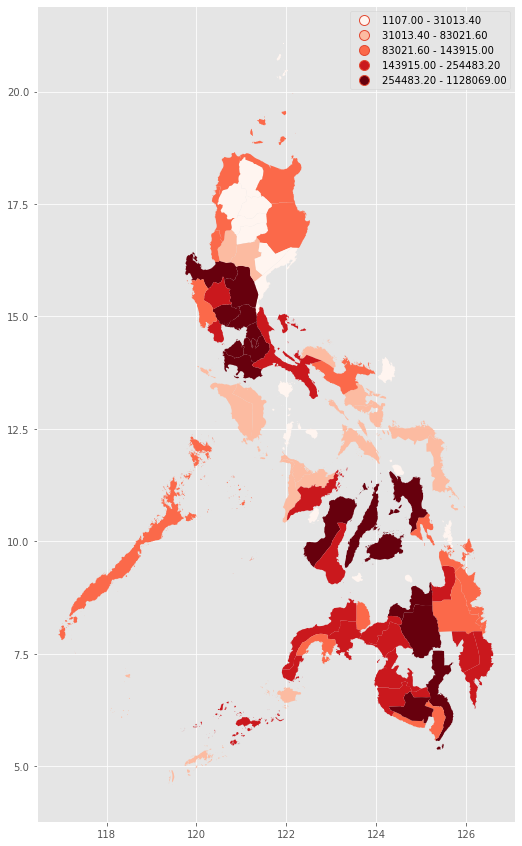

In [27]:
# Choropleth Map of Duterte Votes

presvotes_map = presvotes_merge.plot(figsize=(15,15), cmap = "Reds", column="votes", scheme="quantiles", legend = True)
presvotes_map

### Vice-President

In [16]:
# Winner: Vice-President
vp_win = df_vp.groupby("candidate_name").agg(np.sum).drop(columns=["contest_code", "party_code", "ballots_cast_y", "col5", "col7", "col8", "pct_votes"])
vp_win = vp_win.reset_index()
vp_win


,candidate_name,votes
0,"CAYETANO, ALAN PETER (IND)",5660735.0
1,"ESCUDERO, CHIZ (IND)",4805894.0
2,"HONASAN, GRINGO (UNA)",758183.0
3,"MARCOS, BONGBONG (IND)",13773284.0
4,"ROBREDO, LENI DAANG MATUWID (LP)",13987083.0
5,"TRILLANES, ANTONIO IV (IND)",842288.0


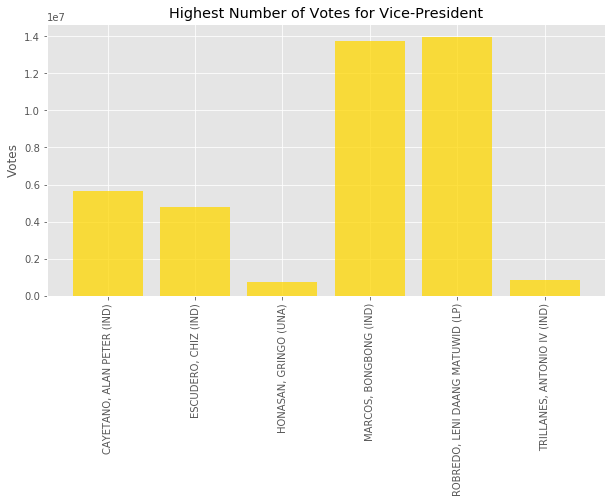

In [17]:
plt.figure(figsize=(10,5))
plt.style.use("ggplot")
plt.bar(vp_win["candidate_name"], vp_win["votes"], color='gold', alpha=0.75)
plt.xticks(rotation=90)

plt.ylabel("Votes")

plt.title("Highest Number of Votes for Vice-President")
plt.show()

In [18]:
# Provinces x Winning Candidate

vp_prov = df_vp.groupby(["province", "candidate_name"]).sum().drop(columns=["contest_code", "party_code", "ballots_cast_y", "col5", "col7", "col8", "pct_votes"]).sort_values("votes",ascending=False)
vp_prov = vp_prov.groupby(level=0).head(1)
vp_prov = vp_prov.reset_index()
vp_prov 

# pd.Series(vp_prov["province"]).is_unique


,province,candidate_name,votes
0,PANGASINAN,"MARCOS, BONGBONG (IND)",813709.0
1,CEBU,"ROBREDO, LENI DAANG MATUWID (LP)",802576.0
2,NEGROS OCCIDENTAL,"ROBREDO, LENI DAANG MATUWID (LP)",712996.0
3,NATIONAL CAPITAL REGION - SECOND DISTRICT,"MARCOS, BONGBONG (IND)",710423.0
4,ILOILO,"ROBREDO, LENI DAANG MATUWID (LP)",705831.0
...,...,...,...
85,DINAGAT ISLANDS,"MARCOS, BONGBONG (IND)",18256.0
86,MIDDLE EAST AND AFRICAS,"MARCOS, BONGBONG (IND)",15690.0
87,EUROPE,"MARCOS, BONGBONG (IND)",12856.0
88,BATANES,"ROBREDO, LENI DAANG MATUWID (LP)",4566.0


In [19]:
# Double click on Robredo: Choropleth Map of Robredo votes

vp_votes = df_vp.loc[df_vp["candidate_name"] == "ROBREDO, LENI DAANG MATUWID (LP)", :]
vp_votes = vp_votes.groupby("province").sum().drop(columns=["contest_code", "party_code", "ballots_cast_y", "col5", "col7", "col8", "pct_votes"])
vp_votes = vp_votes.reset_index()
vp_votes

vpvotes_merge = pd.merge(shp_df, vp_votes, on="province", how="inner")
vpvotes_merge


,province,geometry,votes
0,ABRA,"POLYGON ((120.77472687 17.1631794, 120.7663726...",5380.0
1,AGUSAN DEL NORTE,"POLYGON ((125.4462738 8.66631031, 125.44199371...",106988.0
2,AGUSAN DEL SUR,"POLYGON ((125.90923309 7.9984498, 125.90175629...",142099.0
3,AKLAN,"(POLYGON ((122.42082977 11.63193989, 122.41999...",145611.0
4,ALBAY,"(POLYGON ((123.28764343 13.04922962, 123.28685...",376246.0
...,...,...,...
72,TAWI-TAWI,"(POLYGON ((119.46694183 4.58693981, 119.466392...",41709.0
73,ZAMBALES,"(POLYGON ((120.0828476 14.7504797, 120.0822219...",103720.0
74,ZAMBOANGA DEL NORTE,"(POLYGON ((122.09467316 7.53151989, 122.094673...",200265.0
75,ZAMBOANGA DEL SUR,"(POLYGON ((122.29815674 6.87506008, 122.298156...",171665.0


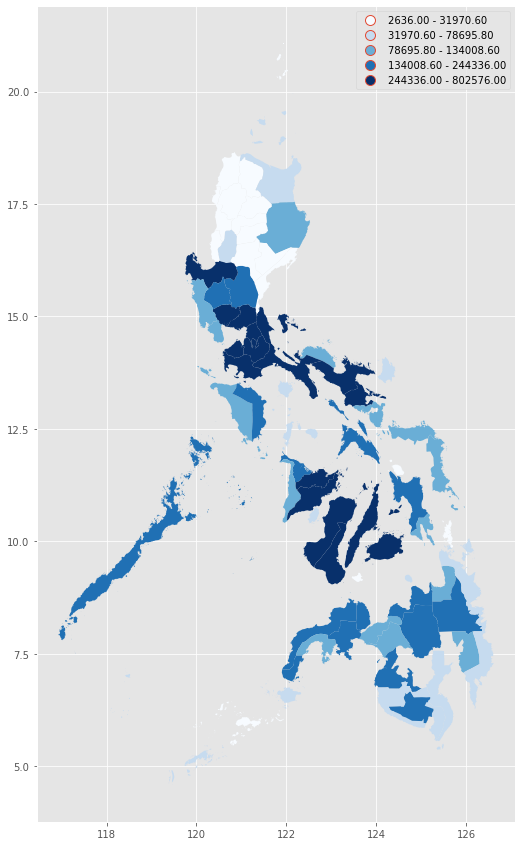

In [24]:
# Choropleth Map of Duterte Votes

vpvotes_map = vpvotes_merge.plot(figsize=(15,15), cmap = "Blues", column="votes", scheme="quantiles", legend = True)
vpvotes_map